In [1]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

In [2]:
l1 = l2 = l3 = 10

In [3]:
## Generating dataset for training

def three_link_manipulator_dataset():
    rows = []
    for i in range(1, 100000):
        theta1 = round(random.uniform(0, math.pi), 2)
        theta2 = round(random.uniform(-math.pi, 0), 2)
        theta3 = round(random.uniform(-math.pi/2, math.pi/2), 2)
        
        x = round(l1*math.cos(theta1)+l2*math.cos(theta1+theta2)+l3*math.cos(theta1+theta2+theta3), 2)
        y = round(l1*math.sin(theta1)+l2*math.sin(theta1+theta2)+l3*math.sin(theta1+theta2+theta3), 2)
        phi = round(math.degrees(theta1)+math.degrees(theta2)+math.degrees(theta3), 2)
        
        rows.append([theta1, theta2, theta3, x, y, phi])

    df = pd.DataFrame(rows, columns=['theta1', 'theta2', 'theta3', 'x', 'y', 'phi'])
    df.to_csv('three_link.csv', index=False)
    
three_link_manipulator_dataset()

In [4]:
three_link_data = pd.read_csv('three_link.csv')
three_link_data.head()

,theta1,theta2,theta3,x,y,phi
0,1.21,-0.81,-1.13,20.19,6.58,-41.83
1,0.01,-1.89,1.51,16.28,-13.04,-21.20
2,2.58,-2.18,1.33,-0.84,19.09,99.12
3,2.94,-0.99,-0.36,-13.69,21.29,91.10
4,0.60,-1.83,-0.83,6.90,-12.61,-118.03


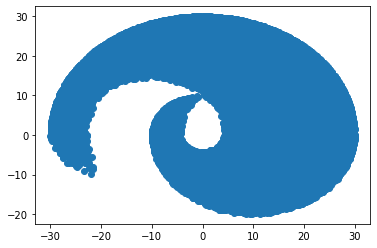

In [5]:

plt.scatter(three_link_data['x'], three_link_data['y'])
plt.show()

In [6]:
# Splitting training and testing dataset

X = three_link_data[['x', 'y', 'phi']]
y = three_link_data[['theta1', 'theta2', 'theta3']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

In [7]:
# Defining model

model = models.Sequential()
model.add(layers.Dense(units=3, input_dim=3, kernel_initializer='uniform'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=3, kernel_initializer = 'uniform', activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 10,815
Trainable params: 10,815
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [9]:
# Training model

history = model.fit(train_X, train_y, epochs=30, validation_split=0.1, shuffle=True)

Epoch 1/30
2532/2532 [==============================] - 3s 913us/step - loss: 0.4003 - accuracy: 0.9095 - val_loss: 0.0353 - val_accuracy: 0.9584
Epoch 2/30
2532/2532 [==============================] - 2s 749us/step - loss: 0.0333 - accuracy: 0.9672 - val_loss: 0.0224 - val_accuracy: 0.9677
Epoch 3/30
2532/2532 [==============================] - 2s 817us/step - loss: 0.0251 - accuracy: 0.9724 - val_loss: 0.0311 - val_accuracy: 0.9587
Epoch 4/30
2532/2532 [==============================] - 2s 779us/step - loss: 0.0222 - accuracy: 0.9753 - val_loss: 0.0262 - val_accuracy: 0.9633
Epoch 5/30
2532/2532 [==============================] - 2s 765us/step - loss: 0.0191 - accuracy: 0.9779 - val_loss: 0.0177 - val_accuracy: 0.9717
Epoch 6/30
2532/2532 [==============================] - 2s 785us/step - loss: 0.0171 - accuracy: 0.9795 - val_loss: 0.0212 - val_accuracy: 0.9783
Epoch 7/30
2532/2532 [==============================] - 2s 775us/step - loss: 0.0172 - accuracy: 0.9780 - val_loss: 0.0166 -

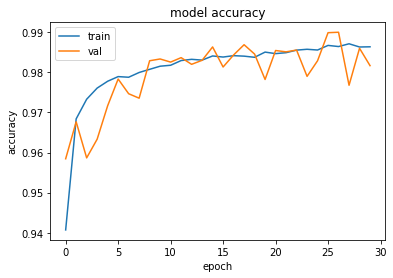

In [10]:
# Plotting model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

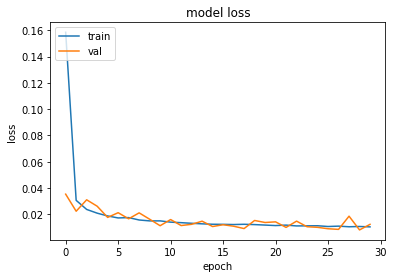

In [11]:
# Plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:

# Evaluating the model on test set

test_loss, test_acc = model.evaluate(test_X, test_y)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)

313/313 [==============================] - 0s 557us/step - loss: 0.0133 - accuracy: 0.9818

Testing Loss =  0.013339062221348286
Testing Accuracy =  0.9818000197410583


In [13]:
def iiitm_dataset():
    rows = []

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for T
    arr = np.linspace(8.5, 10.5, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 9.5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for M
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((-y)+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((y)+19)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('iiitm.csv', index=False)
    
iiitm_dataset()

In [14]:
def three_link_forward_kinematics(theta1, theta2, theta3):
    x = (np.cos(theta1)*l1)+(np.cos(theta1+theta2)*l2)+(np.cos(theta1+theta2+theta3)*l3)
    y = (np.sin(theta1)*l1)+(np.sin(theta1+theta2)*l2)+(np.sin(theta1+theta2+theta3)*l3)

    return x, y

In [15]:
iiitm_data = pd.read_csv('iiitm.csv')
iiitm_predictions = model.predict(iiitm_data.values)
x_predictions, y_predictions = three_link_forward_kinematics(iiitm_predictions[:,0], iiitm_predictions[:,1], iiitm_predictions[:,2])

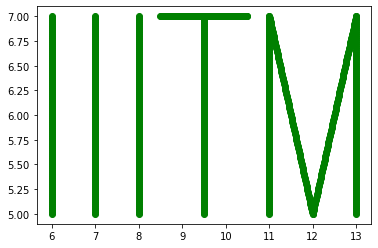

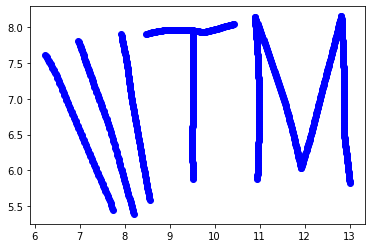

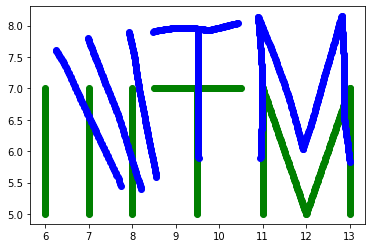

In [16]:
# Original
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.show()

# Predicted
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

# Original and Predicted
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

In [17]:
def kaustubh_dataset():
    rows = []

    # for K
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 6, 100)
    for y in arr:
        x = -y+11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(6, 7, 100)
    for y in arr:
        x = y -1
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for A
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = (y+9)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = (-y+23)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(7.5, 8.5, 50)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for U
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 10
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 12
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(10, 12, 50)
    for x in arr:
        y = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for S
    arr = np.linspace(6, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(13, 15, 100)
    for x in arr:
        y = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(13, 15, 100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(13, 15, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    
    arr = np.linspace(5, 6, 100)
    for y in arr:
        x = 15
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for T
    arr = np.linspace(16, 18, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 17
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for U
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 19
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 21
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(19, 21, 50)
    for x in arr:
        y = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for B
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 22
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 24
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(22,24,100)
    for x in arr:
        y = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(22,24,100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(22,24,100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for H
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 25
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(25,27,100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 27
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
        
    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('kaustubh.csv', index=False)
kaustubh_dataset()

In [18]:
def three_link_forward_kinematics(theta1, theta2, theta3):
    x = (np.cos(theta1)*l1)+(np.cos(theta1+theta2)*l2)+(np.cos(theta1+theta2+theta3)*l3)
    y = (np.sin(theta1)*l1)+(np.sin(theta1+theta2)*l2)+(np.sin(theta1+theta2+theta3)*l3)

    return x, y

In [19]:
kaustubh_data = pd.read_csv('kaustubh.csv')
kaustubh_predictions = model.predict(kaustubh_data.values)
x_predictions, y_predictions = three_link_forward_kinematics(kaustubh_predictions[:,0], kaustubh_predictions[:,1], kaustubh_predictions[:,2])

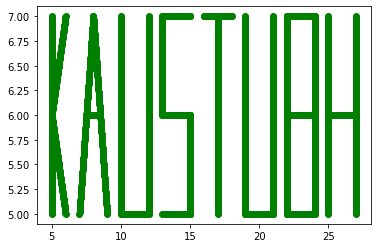

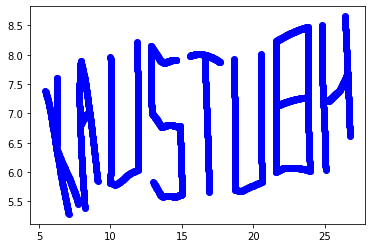

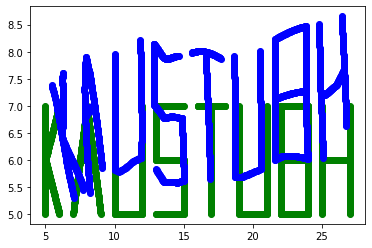

In [20]:
# Original
plt.plot(kaustubh_data['x'], kaustubh_data['y'], 'go')
plt.show()

# Predicted
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

# Original and Predicted
plt.plot(kaustubh_data['x'], kaustubh_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()